# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

596

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [9]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [10]:
print(query_url + "shanghai")

http://api.openweathermap.org/data/2.5/weather?appid=aa68613446f4c71f2f370368952418d7&units=imperial&q=shanghai


In [12]:
shanghai = requests.get(query_url + "shanghai").json()
shanghai

{'coord': {'lon': 121.46, 'lat': 31.22},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 59.77,
  'feels_like': 53.67,
  'temp_min': 57.99,
  'temp_max': 60.8,
  'pressure': 1017,
  'humidity': 59},
 'visibility': 10000,
 'wind': {'speed': 8.95, 'deg': 100},
 'clouds': {'all': 75},
 'dt': 1585629405,
 'sys': {'type': 1,
  'id': 9659,
  'country': 'CN',
  'sunrise': 1585604643,
  'sunset': 1585649536},
 'timezone': 28800,
 'id': 1796236,
 'name': 'Shanghai',
 'cod': 200}

In [13]:
city_data=[]

print("Beginning Data Retrieval     ")
print("-----------------------------")

record_count = 1
set_count = 1


for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | papar
Processing Record 2 of Set 1 | bredasdorp
Processing Record 3 of Set 1 | puerto ayora
Processing Record 4 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | oriximina
Processing Record 7 of Set 1 | butaritari
Processing Record 8 of Set 1 | bluff
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 11 of Set 1 | jimenez
Processing Record 12 of Set 1 | kamina
Processing Record 13 of Set 1 | srednekolymsk
Processing Record 14 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 15 of Set 1 | burgeo
Processing Record 16 of Set 1 | ulladulla
Processing Record 17 of Set 1 | hosangadi
Processing Record 18 of Set 1 | rikitea
Processing Record 19 of Set 1 | cherskiy
Processing Record 20 of Set 1 | ponta delgada
Processing Record 21 

Processing Record 34 of Set 4 | san cristobal
Processing Record 35 of Set 4 | broome
Processing Record 36 of Set 4 | antonina
Processing Record 37 of Set 4 | larap
Processing Record 38 of Set 4 | caravelas
Processing Record 39 of Set 4 | sao joao da barra
Processing Record 40 of Set 4 | hilo
Processing Record 41 of Set 4 | aden
Processing Record 42 of Set 4 | batagay-alyta
Processing Record 43 of Set 4 | pangody
Processing Record 44 of Set 4 | ardistan
City not found. Skipping...
Processing Record 45 of Set 4 | namibe
Processing Record 46 of Set 4 | iaciara
Processing Record 47 of Set 4 | chapais
Processing Record 48 of Set 4 | faanui
Processing Record 49 of Set 4 | mahebourg
Processing Record 0 of Set 5 | jardim
Processing Record 1 of Set 5 | kota belud
Processing Record 2 of Set 5 | saint-philippe
Processing Record 3 of Set 5 | gravdal
Processing Record 4 of Set 5 | hovd
Processing Record 5 of Set 5 | yambio
Processing Record 6 of Set 5 | banfora
Processing Record 7 of Set 5 | ust-ku

Processing Record 23 of Set 8 | clyde river
Processing Record 24 of Set 8 | tamandare
Processing Record 25 of Set 8 | oranjemund
Processing Record 26 of Set 8 | lorengau
Processing Record 27 of Set 8 | gamba
Processing Record 28 of Set 8 | remanso
Processing Record 29 of Set 8 | finnsnes
Processing Record 30 of Set 8 | wuwei
Processing Record 31 of Set 8 | xiongyue
Processing Record 32 of Set 8 | araouane
Processing Record 33 of Set 8 | westport
Processing Record 34 of Set 8 | taybad
Processing Record 35 of Set 8 | chilca
Processing Record 36 of Set 8 | calbuco
Processing Record 37 of Set 8 | abilene
Processing Record 38 of Set 8 | marcona
City not found. Skipping...
Processing Record 39 of Set 8 | stavrovo
Processing Record 40 of Set 8 | san policarpo
Processing Record 41 of Set 8 | usinsk
Processing Record 42 of Set 8 | terney
Processing Record 43 of Set 8 | vila velha
Processing Record 44 of Set 8 | banda aceh
Processing Record 45 of Set 8 | arlit
Processing Record 46 of Set 8 | bel

Processing Record 11 of Set 12 | trinidad
Processing Record 12 of Set 12 | daru
Processing Record 13 of Set 12 | kokopo
Processing Record 14 of Set 12 | abu dhabi
Processing Record 15 of Set 12 | marienburg
Processing Record 16 of Set 12 | abalak
Processing Record 17 of Set 12 | frohnleiten
Processing Record 18 of Set 12 | dauphin
Processing Record 19 of Set 12 | chaohu
Processing Record 20 of Set 12 | san vicente
Processing Record 21 of Set 12 | bodden town
Processing Record 22 of Set 12 | prince rupert
Processing Record 23 of Set 12 | alekseyevsk
Processing Record 24 of Set 12 | bay roberts
Processing Record 25 of Set 12 | santa rosa
Processing Record 26 of Set 12 | zaplyusye
City not found. Skipping...
Processing Record 27 of Set 12 | fulton
Processing Record 28 of Set 12 | kidal
Processing Record 29 of Set 12 | tir pol
City not found. Skipping...
Processing Record 30 of Set 12 | rocha
Processing Record 31 of Set 12 | mukhtolovo
Processing Record 32 of Set 12 | cayenne
Processing Re

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [14]:
city_data_df = pd.DataFrame(city_data)

city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,papar,5.73,115.93,89.60,70,20,6.93,MY,1585630009
1,bredasdorp,-34.53,20.04,51.80,81,100,4.76,ZA,1585629845
2,puerto ayora,-0.74,-90.35,78.01,84,10,3.00,EC,1585630010
3,mataura,-46.19,168.86,64.99,72,29,8.01,NZ,1585629846
4,oriximina,-1.77,-55.87,75.96,94,76,1.39,BR,1585630013


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

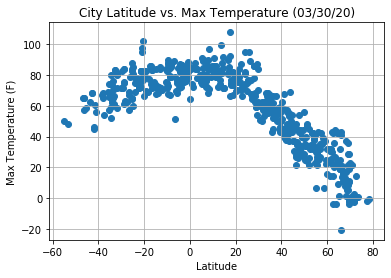

In [17]:
plt.scatter(x=city_data_df['Lat'], y=city_data_df['Max Temp'],
           marker="o")
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("../output_data/Fig1.png")

#### Latitude vs. Humidity Plot

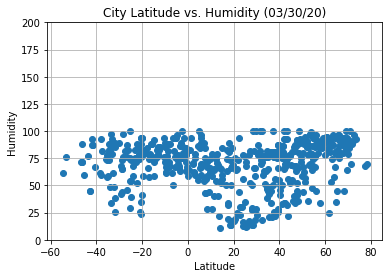

In [20]:
plt.scatter(x=city_data_df['Lat'], y=city_data_df['Humidity'],
           marker="o")
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.ylim((0, 200))
plt.grid(True)

plt.savefig("../output_data/Fig2.png")

#### Latitude vs. Cloudiness Plot

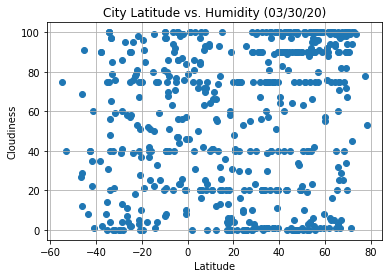

In [27]:
plt.scatter(x=city_data_df['Lat'], y=city_data_df['Cloudiness'],
           marker="o")
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("../output_data/Fig3.png")

#### Latitude vs. Wind Speed Plot

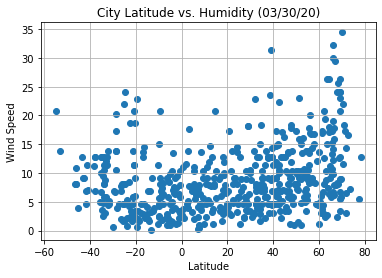

In [28]:
plt.scatter(x=city_data_df['Lat'], y=city_data_df['Wind Speed'],
           marker="o")
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("../output_data/Fig4.png")

## Linear Regression

In [30]:
# OPTIONAL: Create a function to create Linear Regression plots
# Create a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Run regresson on southern hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [26]:
# Create Northern and Southern Hemisphere DataFrames
northen = city_data_df.loc[(city_data_df['Lat']>=0)]
southern = city_data_df.loc[(city_data_df['Lat']<0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.9181550978723022


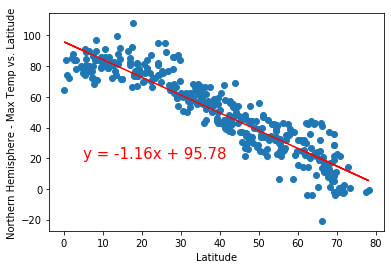

In [46]:
plot_linear_regression(northen["Lat"], northen["Max Temp"], 
                      "Northern Hemisphere - Max Temp vs. Latitude", (5,20))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5847984507557319


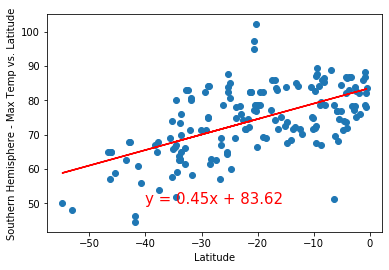

In [47]:
plot_linear_regression(southern["Lat"], southern["Max Temp"], 
                      "Southern Hemisphere - Max Temp vs. Latitude", (-40,50))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.38459559347105365


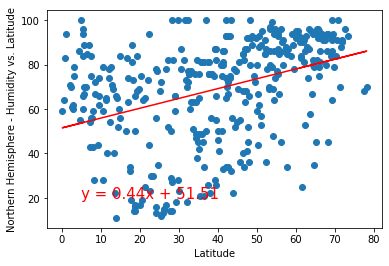

In [48]:
plot_linear_regression(northen["Lat"], northen["Humidity"], 
                      "Northern Hemisphere - Humidity vs. Latitude", (5,20))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.17387203977058593


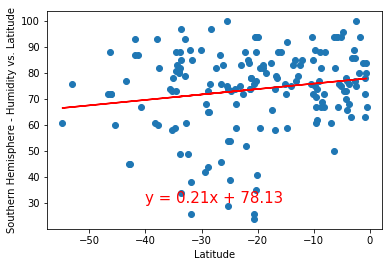

In [49]:
plot_linear_regression(southern["Lat"], southern["Humidity"], 
                      "Southern Hemisphere - Humidity vs. Latitude", (-40,30))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.23352450332453556


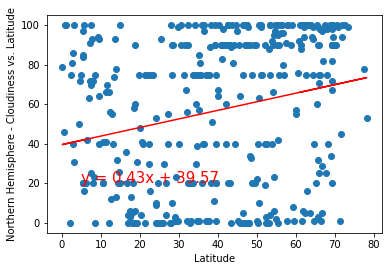

In [50]:
plot_linear_regression(northen["Lat"], northen["Cloudiness"], 
                      "Northern Hemisphere - Cloudiness vs. Latitude", (5,20))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.18026078905001428


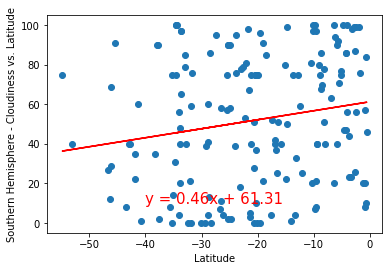

In [51]:
plot_linear_regression(southern["Lat"], southern["Cloudiness"], 
                      "Southern Hemisphere - Cloudiness vs. Latitude", (-40,10))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.35473442570883057


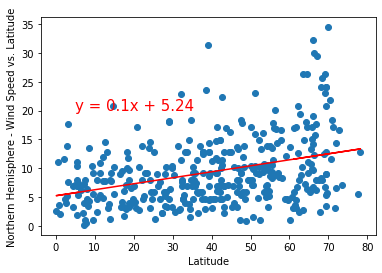

In [52]:
plot_linear_regression(northen["Lat"], northen["Wind Speed"], 
                      "Northern Hemisphere - Wind Speed vs. Latitude", (5,20))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.29036204092337614


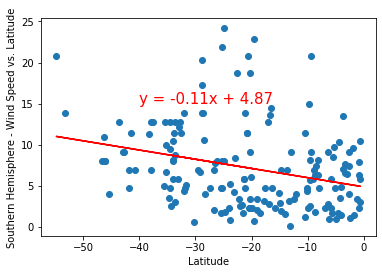

In [54]:
plot_linear_regression(southern["Lat"], southern["Wind Speed"], 
                      "Southern Hemisphere - Wind Speed vs. Latitude", (-40,15))